In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
pd.set_option('display.max_columns', None)
states = ["AL", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
us_state_abbrev = {'the United States':'US','Alabama': 'AL','Alaska': 'AK','American Samoa': 'AS','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO', 'Connecticut': 'CT','Delaware': 'DE','District of Columbia': 'DC', 'Florida': 'FL','Georgia': 'GA','Guam': 'GU','Hawaii': 'HI', 'Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA', 'Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO', 'Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC', 'North Dakota': 'ND','Northern Mariana Islands':'MP','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Puerto Rico': 'PR', 'Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT', 'Vermont': 'VT','Virgin Islands': 'VI','Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))
plt.style.use('ggplot')

api_key = 'c539dd02b98ef2d57482dfe39f7d6980'
my_url = 'http://api.eia.gov/series/?api_key=' + api_key + '&series_id='

In [23]:
my_url+'SEDS.ESRCB.'+sa+'.A'

'http://api.eia.gov/series/?api_key=c539dd02b98ef2d57482dfe39f7d6980&series_id=SEDS.ESRCB.MA.A'

In [35]:
def get_tags(sa):
    return ['SEDS.ESRCB.'+sa+'.A','SEDS.NGRCB.'+sa+'.A']

def return_state_EIA_data(start_year, end_year, sa, tags):
    years = range(start_year, end_year+1)
    final_output = pd.DataFrame(index=years)
    final_output.index.name = 'Year'
    for d in tags:
        #try:
        r = requests.get(my_url + d)
        #except:
        #    print('Error requesting the following API Key: ', d)
        json_data = r.json()
        json_data = json_data['series'][0]
        value_name = json_data['name'] + ' (' + json_data['units'] +')'
        json_data['data']
        temp_dict = dict()
        for pair in json_data['data']:
            temp_dict[str(pair[0])] = pair[1]
        temp_col = []
        for year in years:
            temp_val = ''
            if(str(year) in temp_dict.keys()):
                temp_val = temp_dict[str(year)]  
            temp_col.append(temp_val)
        final_output[value_name] = temp_col

    return final_output.T

In [38]:
df = return_state_EIA_data(2000, 2019, 'CA', get_tags('CA'))

In [39]:
df.head()

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
"Electricity consumed by (i.e., sold to) the residential sector, California (Billion Btu)",270369,261590,263414,282943,284429,292103,306520,304209,311280,306393,297721,301615,307455,304493,304899,304986,301317,307501,304009,298632
"Natural gas consumed by (delivered to) the residential sector, California (Billion Btu)",494165,520632,520837,507874,522272,494886,502984,506805,502833,493696,505530,522406,487614,494357,408754,415935,426390,446314,438159,480485


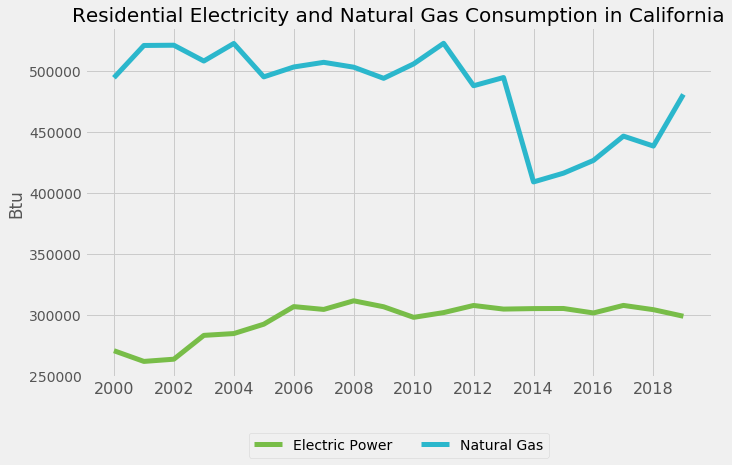

In [56]:
graph_start_year = 2000
graph_end_year = 2019
x = range(2000,2020)

plt.figure(figsize = (10,6))
plt.style.use('fivethirtyeight')
plt.plot(x,df.iloc[0,:], linewidth='5',color='#78bd48', label='Electric Power')
plt.plot(x,df.iloc[1,:], linewidth='5',color='#2bb7cc', label='Natural Gas')

#plt.plot(dfco2e.iloc[:,5], linewidth='3.5', color='#2bb7cc', label='Buildings')
#plt.ylim(0,max(df.iloc[1,:])*1.1)
#plt.yticks(np.arange(0,val_max*1.1, step=round(val_max/5,-2)), fontsize=12)
plt.xticks((np.arange(2000, 2020, step=2)), fontsize=16)
plt.ylabel('Btu')
plt.title('Residential Electricity and Natural Gas Consumption in California', fontsize=20)
plt.legend(fontsize=14, ncol=2, bbox_to_anchor=(0.5, -0.25), loc='lower center')
plt.show()